# IDX Data Scientist Virtual Internship Program
### Credit Risk Prediction

Muhammad Farhan Zahirysah

---

### Description
Manajemen risiko kredit adalah praktik untuk memitigasi kerugian dengan memahami kecukupan modal bank dan cadangan kerugian pinjaman pada waktu tertentu. Suatu proses yang menjadi tantangan bagi lembaga keuangan.

Salah satu kemajuan teknologi yang saat ini menjadi tren adalah machine learning. Machine learning dianggap menjadi salah satu pendukung kemajuan teknologi untuk segala aspek, khususnya dalam pengolahan data. 

Dengan Machine learning ini kita dapat menyediakan solusi teknologi bagi company lending dengan cara membangun model yang dapat memprediksi credit risk. 



### Objective

Untuk membuat model yang bisa memprediksi apakah seorang calon costumer memiliki credit risk yang tinggi atau rendah untuk apliasi kredit

### Problem Statement

Bagaimana cara membuat model yang sesuai untuk memprediksi seorang calon costumer memiliki credit risk yang tinggi atau rendah untuk apliasi kredit


## I. Load Library & Data

In [1]:
# essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.api as sm
import sklearn

# import scikit-learn libray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Scikit-learn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# import xgboost library
from xgboost import XGBClassifier

# capping outlier library winsorizer
from feature_engine.outliers import Winsorizer,OutlierTrimmer

# removing warnings in cell
import warnings
warnings.filterwarnings('ignore')

memberikan informasi version library untuk disimpan apabila notebook ini ingin dijalankan dikemudian hari yang kemungkinan beberapa code sudah tertinggal zaman.

In [2]:
print('Pandas Version     :',pd.__version__)
print('Numpy Version      :',np.__version__)
print('Statsmodels Version:',sm.__version__)
print('Matplotlib Version :',matplotlib.__version__)
print('Seaborn Version    :',sns.__version__)
print('Sklearn Version    :',sklearn.__version__)

Pandas Version     : 1.4.2
Numpy Version      : 1.21.5
Statsmodels Version: 0.13.2
Matplotlib Version : 3.5.1
Seaborn Version    : 0.11.2
Sklearn Version    : 1.0.2


membuka dataset 

In [3]:
df_ori = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

melihat informasi dataset, terdapat 466285 baris dan 75 kolom

In [4]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

melihat informasi dari kolom yang bertipe data object

In [5]:
df_ori.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


url memiliki high cardinality karena tidak ada baris yang sama. sisanya tidak ada yang terlalu signifikan yang dapat diambil untuk menjadi informasi.

In [6]:
df_ori.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


melihat kolom bertipe data numerik. terdapat banyak sekali kolom yang kosong, kolom ini tidak berguna dan dapat langsung di drop

In [7]:
df = df_ori.dropna(axis=1,how='all')

melihat isi dari kolom object atau kategorikal untuk dipahami apa isi dari kategori masing-masing kolom

In [8]:
for i in df.select_dtypes(include=['object']):
    print(i)
    print(df[i].unique())
    print("-"*50)

term
[' 36 months' ' 60 months']
--------------------------------------------------
grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']
--------------------------------------------------
sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
--------------------------------------------------
emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']
--------------------------------------------------
emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
--------------------------------------------------
home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
--------------------------------------------------
verification_status
['Verified' 'Source Verified' 'Not Verified']
--------------------------------------------------
i

## II. Exploratory Data Analysis

pertama mengambil 10 sample yang nantinya digunakan sebagai data inference, atau dicoba apabila model telah selesai dibuat

In [9]:
data_inf = df.sample(10,random_state=25)
data_inf

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
359679,359679,19907895,22130544,11000,11000,11000.0,36 months,11.67,363.63,B,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,191017.0,20700.0
98896,98896,6844900,8467053,30000,30000,29950.0,60 months,12.35,672.66,B,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,72610.0,53200.0
378928,378928,17413360,19535897,14400,14400,14400.0,60 months,13.98,334.92,C,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,225318.0,46000.0
122070,122070,5955052,7427193,6000,6000,5950.0,36 months,9.71,192.79,B,...,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,0.0,86.0,7905.0,25600.0
204847,204847,1452833,1706564,4000,4000,4000.0,36 months,12.12,133.09,B,...,NaN,Nov-14,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
176139,176139,2835471,3417764,10000,10000,9925.0,36 months,15.80,350.59,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,113523.0,8000.0
143456,143456,4568302,5820635,25000,25000,25000.0,60 months,21.98,690.19,E,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,50.0,679998.0,7300.0
61344,61344,9005984,10798079,16000,16000,15925.0,36 months,7.62,498.59,A,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,51817.0,61600.0
208742,208742,1409714,1659276,4750,4750,4750.0,36 months,14.33,163.11,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
419144,419144,13127910,15150086,29675,29675,29625.0,60 months,22.45,827.21,E,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,66365.0,24800.0


dropping data inference dari dataset kemudian melakukan reset index dari dataset juga data inference

In [10]:
data = df.drop(data_inf.index, axis=0)
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
print(data.shape)
print(data_inf.shape)

(466275, 58)
(10, 58)


melihat distibusi dari target label data. pada kali ini kolom loan_status

In [11]:
print(data['loan_status'].value_counts())
print('-'*50)
print('percentage loan_status : \n',round((data['loan_status'].value_counts()/len(data))*100,2))
print('-'*50)
print('percentage null: \n',(data['loan_status'].isnull().sum()/len(data))*100)

Current                                                224221
Fully Paid                                             184735
Charged Off                                             42474
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64
--------------------------------------------------
percentage loan_status : 
 Current                                                48.09
Fully Paid                                             39.62
Charged Off                                             9.11
Late (31-120 days)                                      1.48
In Grace Period                                         0.67
Does not meet the credit po

terdapat 8 kategori didalam loan_status dan tidak ada missing value. dicoba untuk dilakukan visualisasi dari kolom tersebut

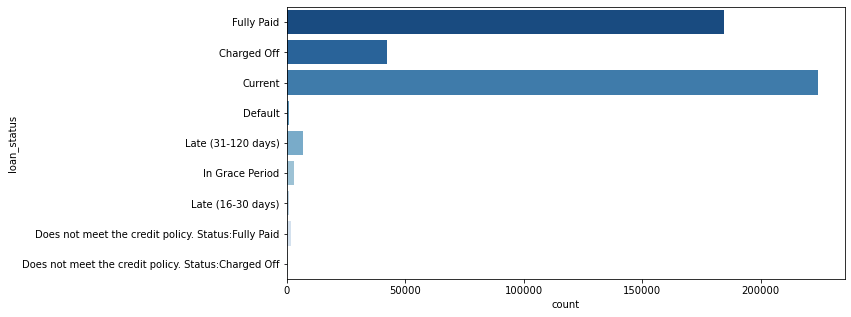

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(y='loan_status',data=data,palette='Blues_r')
plt.show()

karena klasifikasi target label banyak maka akan disederhanakan menjadi Excellent, good, poor, bad.

- excellent artinya orang tersebut memiliki historis kredit yang pernah fully paid dan tidak memiliki masalah
- good artinya orang tersebut sedang melakukan kredit dan belum pernah bermasalah
- poor artinya orang tersebut pernah memiliki riwayat telat bayar
- Bad artinya orang tersebut pernah memiliki riwayat gagal bayar

In [13]:
data['loan_status'] = data['loan_status'].replace(
    {'Fully Paid':'excellent',
    'Current':'good',
    'Charged Off': 'bad',
    'Default':'bad',
    'In Grace Period':'poor',
    'Late (16-30 days)':'poor',
    'Late (31-120 days)':'poor',
    'Does not meet the credit policy. Status:Charged Off':'bad',
    'Does not meet the credit policy. Status:Fully Paid':'bad'})

bila divisualisasikan akan menjadi seperti ini

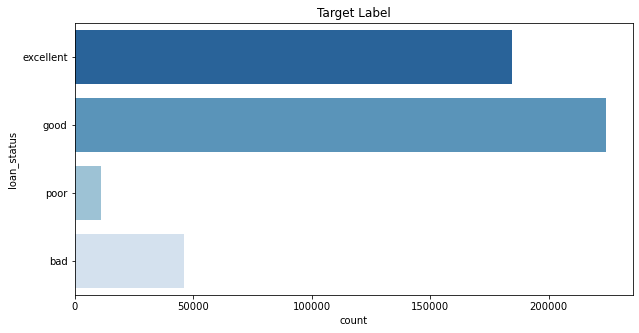

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y='loan_status',data=data, palette='Blues_r',order=['excellent','good','poor','bad'])
plt.savefig('picture/loanstat.png')
plt.title('Target Label')
plt.show()

target label terlihat imbalance, namun tidak terlalu parah maka nanti saat splitting data dilakukan stratify untuk membagi klasifikasi sesuai rasio

### Target Label Analysis

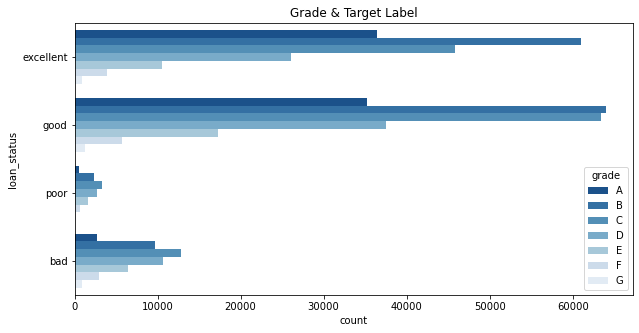

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='loan_status', hue='grade', order=['excellent','good','poor','bad'],
                hue_order = ['A','B','C','D','E','F','G'],palette='Blues_r')
plt.savefig('picture/grade_target.png')
plt.title('Grade & Target Label')
plt.show()

Bila dibandingkan dengan loan status, ada beberapa dengan Grade A masih tergolong kedalam kategori poor dan bad, begitupun sebaliknya. Ada beberapa Grade G yang tergolong kedalam kategori good dan Excellent. Grading belum tentu menunjukan bahwa credit rating akan bagus juga.



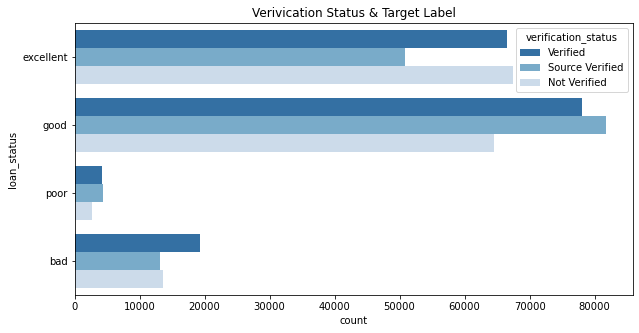

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='loan_status', hue='verification_status', order=['excellent','good','poor','bad'], palette='Blues_r')
plt.savefig('picture/verified_target.png')
plt.title('Verivication Status & Target Label')
plt.show()

Bila dibandingkan dengan verification status, meskipun ada banyak peminjam yang tidak berstatus Verified, tidak menjamin dengan Credit Ratingnya akan baik pula.


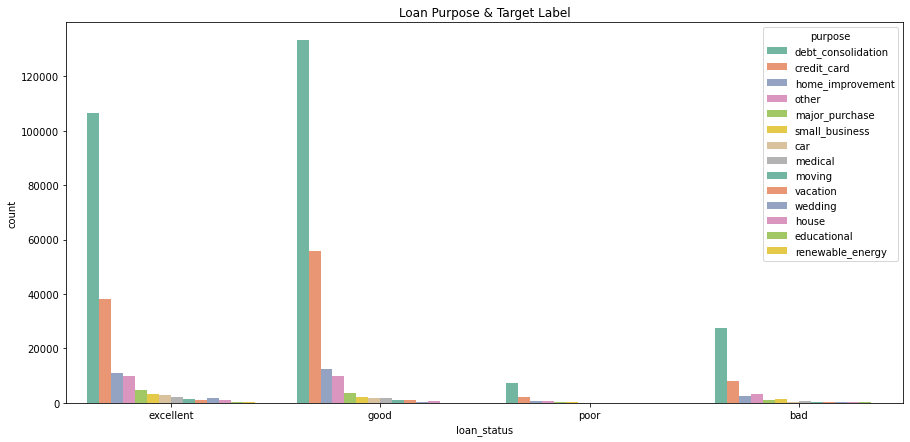

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(data=data, x='loan_status', hue='purpose', order=['excellent','good','poor','bad'], palette='Set2',
            hue_order=data['purpose'].value_counts().index)
plt.savefig('picture/purpose_target.png')
plt.title('Loan Purpose & Target Label')
plt.show()

Tujuan dari peminjaman terbanyak ada pada debt consolidation dan selanjutnya credit card. Distribusi dari tujuan pinjaman dan masing-masing klasifikasi target label cukup mirip, sehingga tidak ada satu tujuan peminjaman yang masuk kedalam kategori credit risk yang buruk 


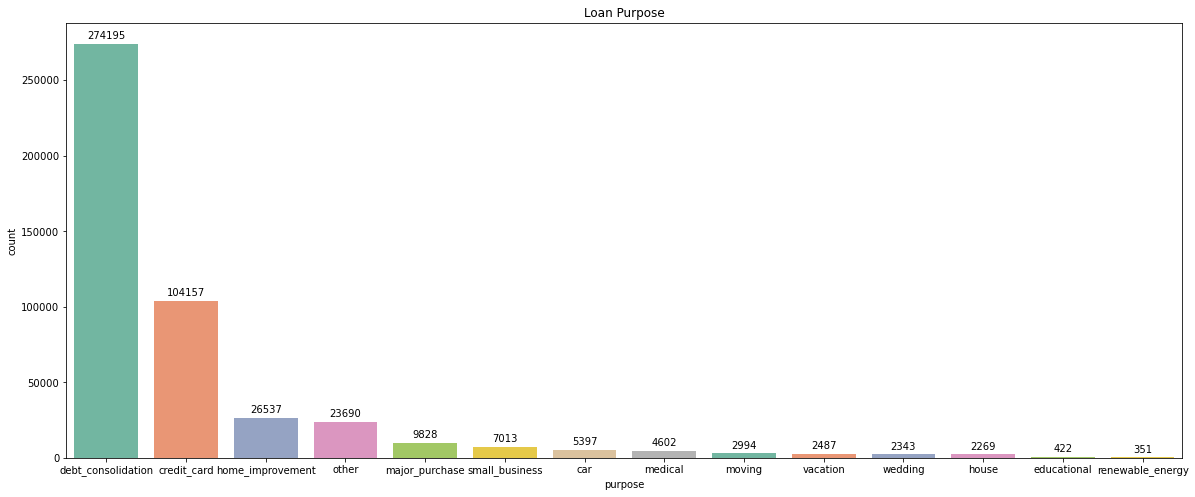

In [18]:
plt.figure(figsize=(20,8))
abs_values = df['purpose'].value_counts(ascending=False).values
ax = sns.countplot(x='purpose',data=data, order=data['purpose'].value_counts().index, palette='Set2')
ax.bar_label(container=ax.containers[0], labels=abs_values, padding=3)
plt.savefig('picture/purpose.png')
plt.title('Loan Purpose')
plt.show()

## III. Data Splitting

splitting data menggunakan stratify, dan test data sebesar 20% dari dataset.

In [19]:
x = data.drop(['loan_status'], axis=1)
y = data['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25,stratify=y)
print('xtrain dataset shape:',x_train.shape)
print('xtest dataset shape:',x_test.shape)
print('ytrain dataset shape:',y_train.shape)
print('ytest dataset shape:',y_test.shape)

xtrain dataset shape: (373020, 57)
xtest dataset shape: (93255, 57)
ytrain dataset shape: (373020,)
ytest dataset shape: (93255,)


## IV. Outlier Handling

Dalam melakukan outlier handling ada beberapa tahapan yang peneliti lakukan untuk mendapatkan data yang bersih. rangkuman tahapan cleaning data adalah sebagai berikut:

- membuat tabel treatment, ini digunakan untuk mengetahui distibusi, lcl, ucl dan treatment yang bisa dilakukan kepada data train untuk dilakukan outlier handling.
- melakukan outlier handling pada data yang normal dan harus di capping dengan cara winsorizer
- melakukan outlier handling pada data yang harus di trim dengan outlier trimmer

untuk lebih jelasnya maka akan dilakukan sama seperti dengan tahapan diatas


In [20]:
# membuat fungsi untuk data yang skew dan dilakukan pencarian batas bawah dan batas atas menggunakan IQR
def iqr(data,column):
    lower_limit= data[column].quantile(0.25) - 3*(data[column].quantile(0.75)-data[column].quantile(0.25))
    upper_limit= data[column].quantile(0.75) + 3*(data[column].quantile(0.75)-data[column].quantile(0.25))
    return lower_limit, upper_limit

# membuat fungsi untuk data yang berdistribusi normal untuk mencari batas atas dan batas bawah menggunakan standard deviasi.
def lcl_ucl_std(data,column):
    lcl = data[column].mean() - 1.5*data[column].std()
    ucl = data[column].mean() + 1.5*data[column].std()
    return lcl,ucl

# membuat fungsi untuk mengetahui berapa banyak persentase outliers untuk masing-masing distribusi yang skewed dan normal. 
# bila tidak terdapat outliers dari kolom tersebut maka nilainya akan menjadi 0
def perc_outliers_iqr(data,column):
    lcl,ucl = iqr(data,column)
    try:
        result = data[column][(data[column]<=lcl) | (data[column]>=ucl)].count()/len(data[column])
    except:
        result = 0
    return result

def perc_outliers_std(data,column):
    lcl,ucl = lcl_ucl_std(data,column)
    try:
        result = data[column][(data[column]<=lcl) | (data[column]>=ucl)].count()/len(data[column])
    except:
        result = 0
    return result
    
# membuat fungsi untuk menyatukan fungsi IQR dan std deviasi. dengan pemilihan fungsi dilihat dari skewness data. 
# apabila diatas -0.5 dan dibawah 0.5 maka data tersebut berdistribusi normal. 
# sedangkan diluar dari nilai tersebut maka data berdistribusi skew
def outliers(data,column,distr):
    if distr <= -0.5 or distr >= 0.5:
        lcl,ucl = iqr(data,column)
        percentage = perc_outliers_iqr(data,column)
    elif distr > -0.5 or distr < 0.5:
        lcl,ucl = lcl_ucl_std(data,column)
        percentage = perc_outliers_std(data,column)
    return lcl,ucl,percentage

untuk mempermudah kolom mana saja yang skew atau normal dan treatment apa saja yang harus dilakukan, saya membuat tabel treatment yang isi nya adalah kolom-kolom numerik dengan deskripsi sebagai berikut:

|Nama Kolom | Deskripsi |
|---|---|
|name| nama kolom numerik|
| distr| nilai skew distribusi|
|percentage| persentasi jumlah outlier yang diluar dari batas bawah dan batas atas|
|skewness| nama distribusi |
|treatment| treatment yang harus dilakukan|

In [21]:
num_columns = x_train.select_dtypes(include=np.number).columns

In [22]:
# menambah data kolom skew pada kolom numerik x_train
skew = []
for i in x_train[num_columns]:
    skew.append(x_train[i].skew())
# menambah data kolom percentage dengan menggunakan fungsi outliers
percentage = []
j = 0
for i in x_train[num_columns]:
    percentage.append(outliers(x_train,i,skew[j])[2])
    j += 1

# menambah kolom treatment untuk mengetahui treatment apa yg harus dilakukan terhadap feature
treatment = []
j=0
for i in x_train[num_columns]:
    if percentage[j] == 0:
        treatment.append('No outliers')
    elif percentage[j] <= 0.05:
        treatment.append('trim')
    elif percentage[j] <= 0.15:
        treatment.append('capping')
    elif percentage[j] > 0.15:
        treatment.append('do not treat')
    j += 1

# menambah kolom distribution dengan melihat nilai skewed. 
# bila didalam nilai -0.5 sampai 0.5 maka berdistribusi normal. diluar nilai tersebut maka berdistribusi skewed
distribution = []
j = 0
for i in x_train[num_columns]:
    if skew[j] >= -0.5 and skew[j] <= 0.5:
        distribution.append('normal')
    else: 
        distribution.append('skewed')
    j += 1

# membuat dataframe dengan variabel outlier_treatment untuk menjadi rangka tabel treatment
outlier_treatment = pd.DataFrame()
outlier_treatment['name'] = x_train[num_columns].columns
outlier_treatment['distr'] = distribution
outlier_treatment['percentage'] = percentage
outlier_treatment['skewness'] = skew
outlier_treatment['treatment'] = treatment

melihat tabel outlier treatment, darisini kita bisa melakukan treatment kepada feature sesuai dengan distribusinya dan jumlah persentase dari outliernya.

In [23]:
outlier_treatment

,name,distr,percentage,skewness,treatment
0,Unnamed: 0,normal,0.134323,-0.000330,capping
1,id,skewed,0.000000,0.691404,No outliers
2,member_id,skewed,0.000000,0.620528,No outliers
3,loan_amnt,skewed,0.000000,0.730362,No outliers
4,funded_amnt,skewed,0.000000,0.734262,No outliers
5,funded_amnt_inv,skewed,0.000000,0.729785,No outliers
6,int_rate,normal,0.136143,0.334737,capping
7,installment,skewed,0.000000,0.948624,No outliers
8,annual_inc,skewed,0.014039,31.427898,trim
9,dti,normal,0.141065,0.187554,capping


Capping feature berdistribusi normal

In [24]:
windsoriser = Winsorizer(capping_method='gaussian', # choose gaussian for mean and std
                          tail='both', # cap both tails 
                          fold=1.5,
                          variables=outlier_treatment[(outlier_treatment['treatment'] == 'capping') & (outlier_treatment['distr'] == 'normal')]['name'].tolist(),
                            missing_values='ignore')

windsoriser.fit(x_train)
x_train_cap_norm = windsoriser.transform(x_train)

Capping feature berdistribusi skewed

In [25]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for mean and std
                          tail='both', # cap both tails 
                          fold=1.5,
                          variables=outlier_treatment[(outlier_treatment['treatment'] == 'capping') & (outlier_treatment['distr'] == 'skewed')]['name'].tolist(),
                            missing_values='ignore')

windsoriser.fit(x_train_cap_norm)
x_train_cap_skew = windsoriser.transform(x_train_cap_norm)

sebelum trimming, dilakukan penggabungan x_train dengan y_train agar jumlah baris dataset akan tetap sama

In [26]:
 y_train_trim = y_train.copy()
 x_train_cap_skew = pd.concat([x_train_cap_skew,y_train_trim],axis=1)

trim feature yang berdistribusi normal

In [27]:
trimmer = OutlierTrimmer(capping_method='gaussian', # choose gaussian for mean and std
                        tail= 'both',
                        fold=3,
                        variables=outlier_treatment[(outlier_treatment['treatment'] == 'trim') & (outlier_treatment['distr'] == 'normal')]['name'].tolist(),
                        missing_values='ignore')

x_train_trim_norm = trimmer.fit(x_train_cap_skew)
x_train_trim_norm = trimmer.transform(x_train_cap_skew)

trim feature yang berdistribusi skewed

In [28]:
trimmer = OutlierTrimmer(capping_method='iqr', # choose iqr for mean and std
                        tail= 'both',
                        fold=3,
                        variables=outlier_treatment[(outlier_treatment['treatment'] == 'trim') & (outlier_treatment['distr'] == 'skewed')]['name'].tolist(),
                        missing_values='ignore')

x_train_outlier_clean = trimmer.fit(x_train_trim_norm)
x_train_outlier_clean = trimmer.transform(x_train_trim_norm)

data telah selesai dilakukan outlier handling

In [29]:
y_train_outlier_clean = x_train_outlier_clean['loan_status']
x_train_outlier_clean = x_train_outlier_clean.drop(['loan_status'],axis=1)

print('Before Outlier handling:', x_train.shape)
print('After Outlier handling:', x_train_outlier_clean.shape)
print(f'Ratio Outlier Handing : {x_train_outlier_clean.shape[0]/x_train.shape[0]:.2%}')

Before Outlier handling: (373020, 57)
After Outlier handling: (348263, 57)
Ratio Outlier Handing : 93.36%


kesimpulannya masih ada 93.36% data yang masih bisa digunakan untuk machine learning setelah dilakukan outlier handling

## V. Missing Value Handling

pertama-tama kita akan melakukan missing value handling pada feature yang kurang dari 6% missing nya

In [30]:
percentage_null = x_train_outlier_clean.isnull().sum()/x_train_outlier_clean.shape[0]
round(percentage_null[(percentage_null <=0.06)&(percentage_null>0)],4)*100

emp_title                     5.94
emp_length                    4.64
annual_inc                    0.00
title                         0.00
delinq_2yrs                   0.01
earliest_cr_line              0.01
inq_last_6mths                0.01
open_acc                      0.01
pub_rec                       0.01
revol_util                    0.07
total_acc                     0.01
last_pymnt_d                  0.08
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.03
acc_now_delinq                0.01
dtype: float64

emp_length merupakan Panjang pekerjaan dalam beberapa tahun. Nilai yang mungkin adalah antara 0 dan 10 di mana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih.

yang artinya ini adalah feature categorical. bila dilihat distribusinya sebagai berikut

<AxesSubplot:xlabel='count', ylabel='emp_length'>

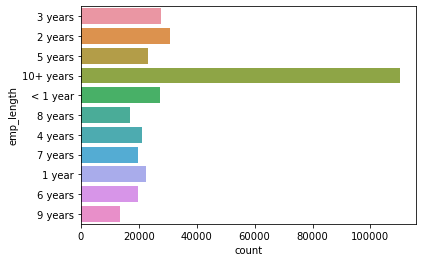

In [31]:
sns.countplot(y = x_train_outlier_clean['emp_length'])

karena feature categorical maka akan dilakukan imputasi nilai yang paling sering muncul yaitu 10+ years

In [32]:
impute_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

emp_length_impute = impute_frequent.fit_transform(x_train_outlier_clean[['emp_length']])
x_train_outlier_clean['emp_length'] = emp_length_impute

untuk emp_title artinya adalah Judul pekerjaan yang disediakan oleh peminjam saat mengajukan pinjaman.

maka ini juga bisa dilakukan imputasi dengan nilai yang paling sering muncul

In [33]:
emp_title_impute = impute_frequent.fit_transform(x_train_outlier_clean[['emp_title']])
x_train_outlier_clean['emp_title'] = emp_title_impute

kemudian trimming untuk feature yang memiliki missing value yang sangat kecil persentasenya

In [34]:
x_train_MV_trim = pd.concat([x_train_outlier_clean,y_train_outlier_clean],axis=1)

In [35]:
x_train_MV_trim = x_train_MV_trim.dropna(subset=['annual_inc', 'title', 'delinq_2yrs', 'earliest_cr_line',
                                        'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
                                        'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
                                        'acc_now_delinq'])

selanjutnya handling dengan missing value yang lebih besar persentasenya

In [36]:
round(percentage_null[(percentage_null >0.06)&(percentage_null>0)],4)*100

desc                           73.31
mths_since_last_delinq         53.75
mths_since_last_record         86.31
next_pymnt_d                   49.53
mths_since_last_major_derog    78.58
tot_coll_amt                   14.87
tot_cur_bal                    14.87
total_rev_hi_lim               14.87
dtype: float64

mengambil feature yang memiliki missing value lebih dari 6%

In [37]:
percentage_null[(percentage_null >0.06)&(percentage_null>0)].index

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

melihat jenis data dan menentukan bagaimana cara handling masing-masing feature

In [38]:
x_train_outlier_clean[['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

,desc,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,mths_since_last_major_derog,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
262809,NaN,NaN,NaN,Feb-16,NaN,0.0,113089.0,42300.0
105968,NaN,46.0,NaN,NaN,46.0,9142.0,37390.0,9300.0
382565,NaN,28.0,NaN,Feb-16,29.0,0.0,423424.0,3100.0
310677,NaN,NaN,NaN,Feb-16,NaN,0.0,292261.0,42400.0
296585,NaN,5.0,NaN,Feb-16,5.0,0.0,49345.0,14600.0
...,...,...,...,...,...,...,...,...
213719,Borrower added on 06/07/12 > I plan to conso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234496,NaN,NaN,NaN,Feb-16,NaN,0.0,24918.0,7600.0
277951,NaN,NaN,NaN,Feb-16,NaN,0.0,166712.0,40500.0
68550,Borrower added on 10/30/13 > To consolidate ...,NaN,NaN,NaN,NaN,0.0,295222.0,10100.0


untuk mempermudah dalam imputasi maka sederhananya saya akan melakukan imputasi median terhadap feature yang bertipe data numerik, sedangakn untuk yang tipe data objek akan dilakukan imputasi dengan most frequent imputation.

In [39]:
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# fit dan transform setiap kolom
mths_since_last_delinq = impute_mean.fit_transform(x_train_MV_trim[['mths_since_last_delinq']])
mths_since_last_record = impute_mean.fit_transform(x_train_MV_trim[['mths_since_last_record']])
mths_since_last_major_derog = impute_mean.fit_transform(x_train_MV_trim[['mths_since_last_major_derog']])
tot_coll_amt = impute_mean.fit_transform(x_train_MV_trim[['tot_coll_amt']])
tot_cur_bal = impute_mean.fit_transform(x_train_MV_trim[['tot_cur_bal']])
total_rev_hi_lim = impute_mean.fit_transform(x_train_MV_trim[['total_rev_hi_lim']])


# memasukan fit dan transform setiap kolom kembali ke dataset.
x_train_MV_trim['mths_since_last_delinq'] = mths_since_last_delinq
x_train_MV_trim['mths_since_last_record'] = mths_since_last_record
x_train_MV_trim['mths_since_last_major_derog'] = mths_since_last_major_derog
x_train_MV_trim['tot_coll_amt'] = tot_coll_amt
x_train_MV_trim['tot_cur_bal'] = tot_cur_bal
x_train_MV_trim['total_rev_hi_lim'] = total_rev_hi_lim

pada "desc" kolom ini merupakan deskripsi dari transaksi. dari feature ini tidak cocok untuk dimasukan kedalam machine learning. maka tidak dilakukan imputasi yang paling sederhana yaitu most frequent

pada kolom "next_payment_d" dilakukan fill dengan backwards fill karena kemungkinan data diinput sesuai dengan tanggal input, sehingga fill dengan baris terdekat akan lebih baik daripada melakuakan impute dengan most frequent

In [40]:
desc = impute_frequent.fit_transform(x_train_MV_trim[['desc']])
next_payment_d = x_train_MV_trim['next_pymnt_d'].fillna(method='bfill')

x_train_MV_trim['desc'] = desc
x_train_MV_trim['next_pymnt_d'] = next_payment_d

checking missing value kembali setelah dilakukan missing value handling

In [41]:
x_train_MV_trim.isnull().sum()

Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
url                            0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc  

data telah selesai dilakukan missing value handling

melakukan dropping target label loan_status setelah missing value handling

In [42]:
x_train_clean = x_train_MV_trim.copy()
y_train_clean = x_train_MV_trim['loan_status']
x_train_clean.drop('loan_status',axis=1,inplace=True)

In [43]:
print('jumlah data pada clean train data: ',x_train_clean.shape)
print('jumlah data pada train data awal: ',x_train.shape)
print(f'Ratio all outliers and missing value trimming : {x_train_clean.shape[0]/x_train.shape[0]:.2%}')

jumlah data pada clean train data:  (347622, 57)
jumlah data pada train data awal:  (373020, 57)
Ratio all outliers and missing value trimming : 93.19%


summary dari missing value handling, data yang masih bisa digunakan sebanyak 93.19% dari dataset awal

## VI. Feature Selection

melakukan feature selection dengan cara melihat korelasi dari feature dengan target label. digunakan heatmap untuk mempermudah pengambilan feature

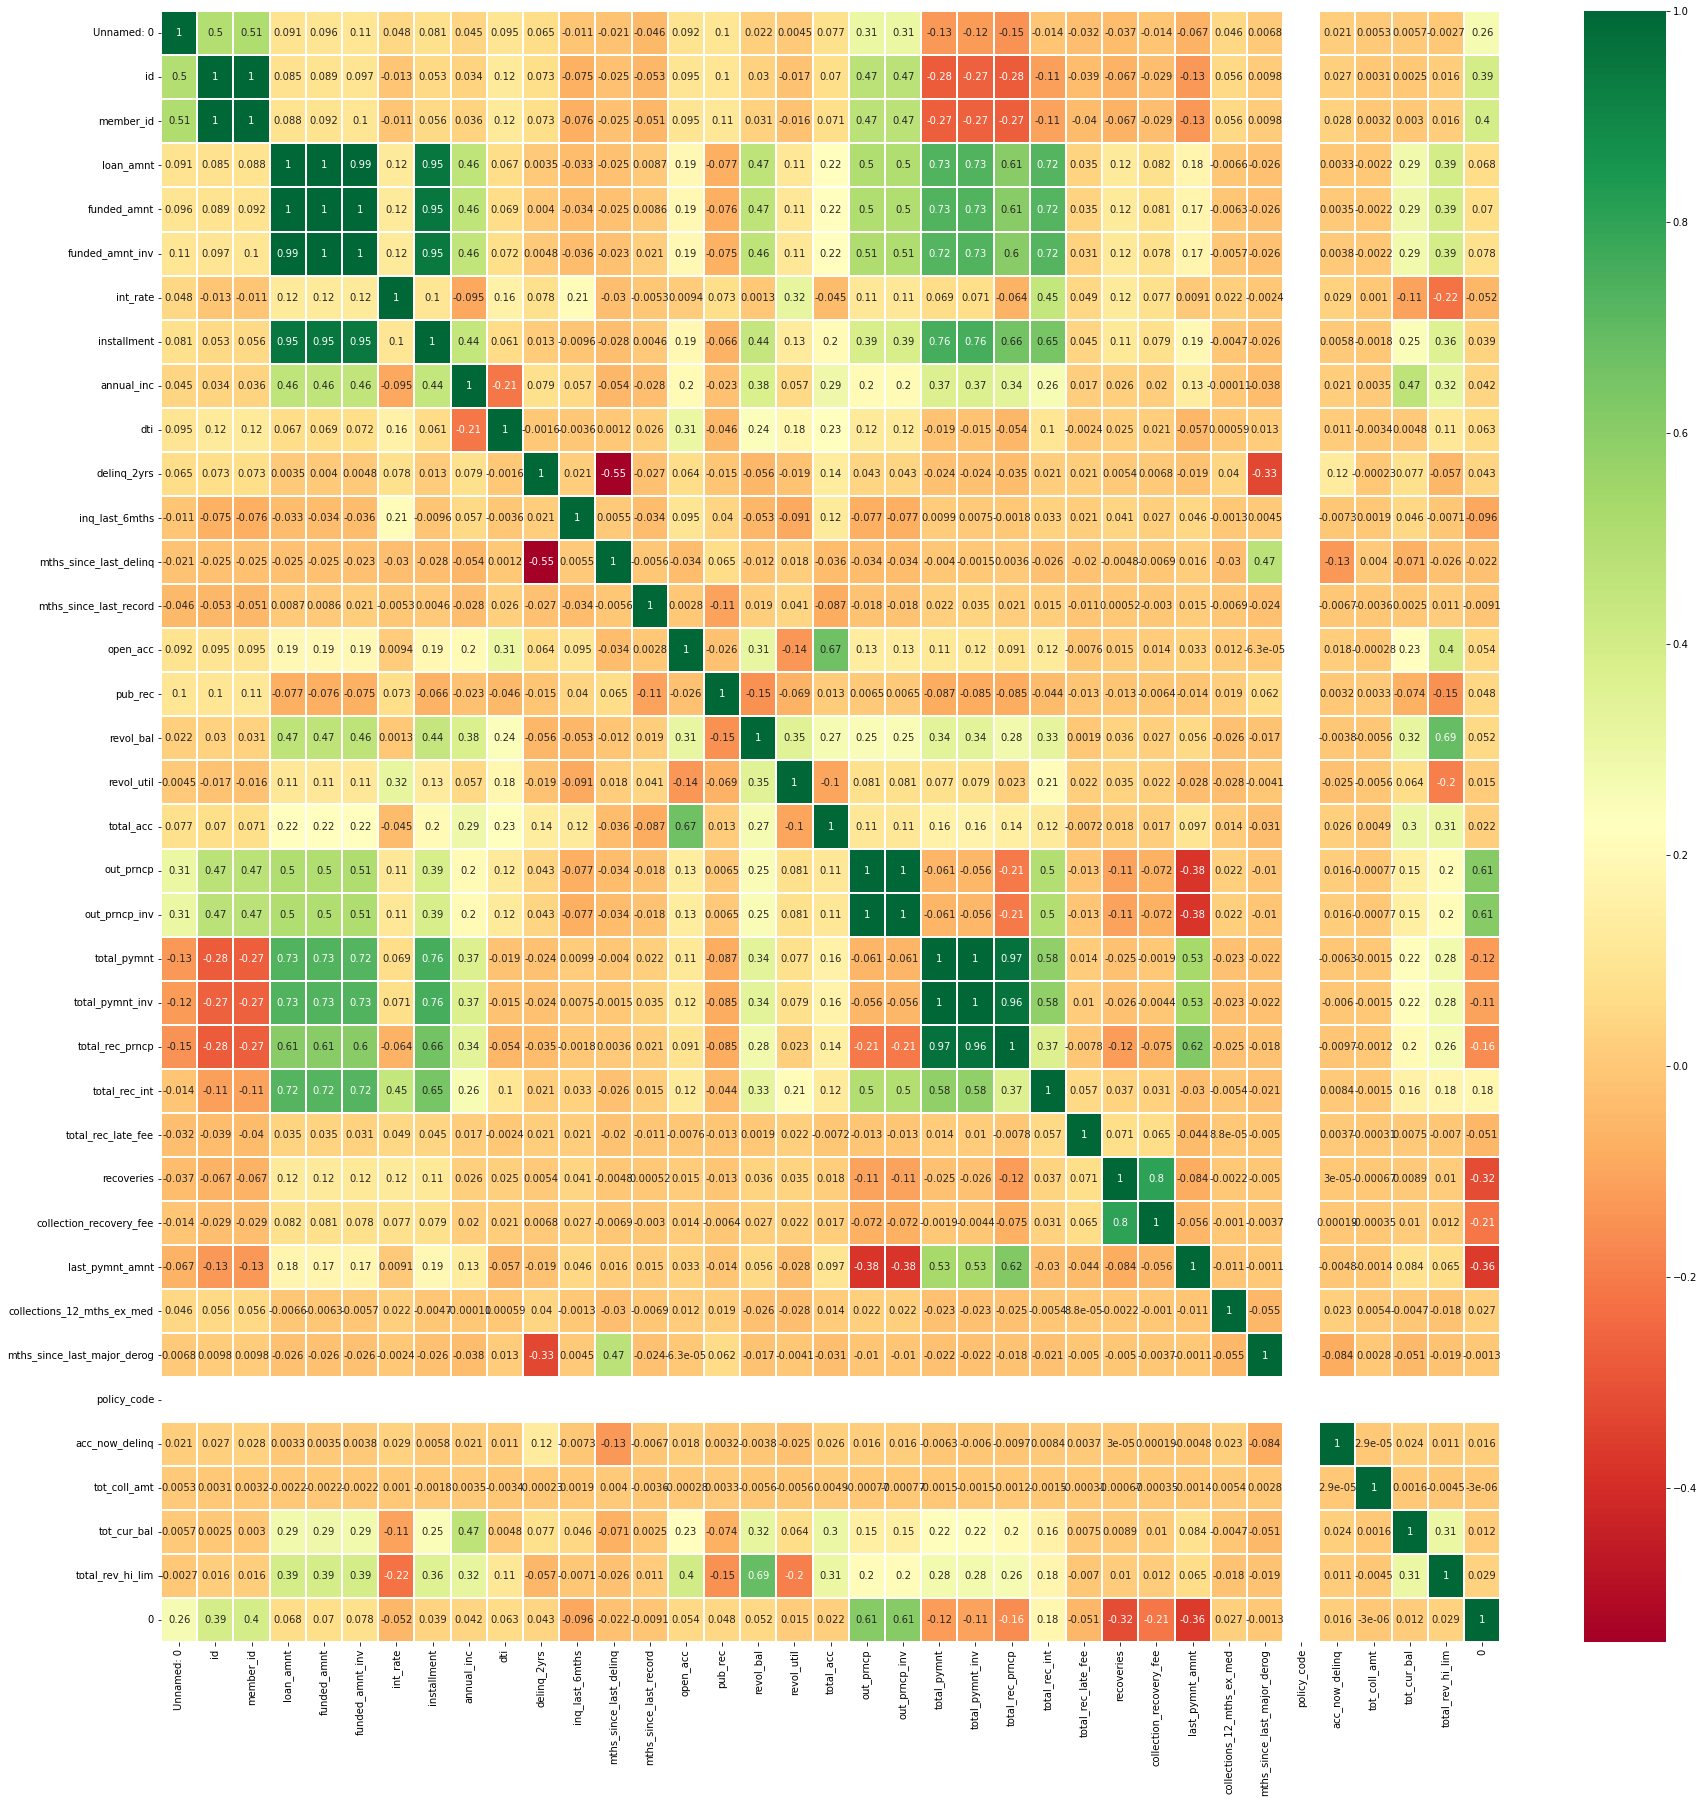

In [44]:
label_enc = LabelEncoder()
y_train_enc = label_enc.fit_transform(y_train_clean)
y_train_enc = pd.Series(y_train_enc,index=y_train_clean.index)

heatmap_after = x_train_clean.copy()
heatmap_after = pd.concat([heatmap_after, y_train_enc], axis=1)

fig = plt.figure(figsize=(30,30))
fig = sns.heatmap(heatmap_after.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

diambil korealasi diatas 0.2 dan dibawah -0.2 karena ada korelasi berbanding lurus dan terbalik dengan target. maka didapatkanlah list feature dibawah

In [45]:
num_select = ['inq_last_6mths','out_prncp','total_rec_prncp','recoveries','last_pymnt_amnt']

untuk feature kategori dilakukan encoding terlebih dahulu dengan ordinal encoder, kemudian dicek korelasinya dengan metode spearman, berbeda yang sebelumnya menggunakn pearson. spearman digunakan untuk feature yang kategori

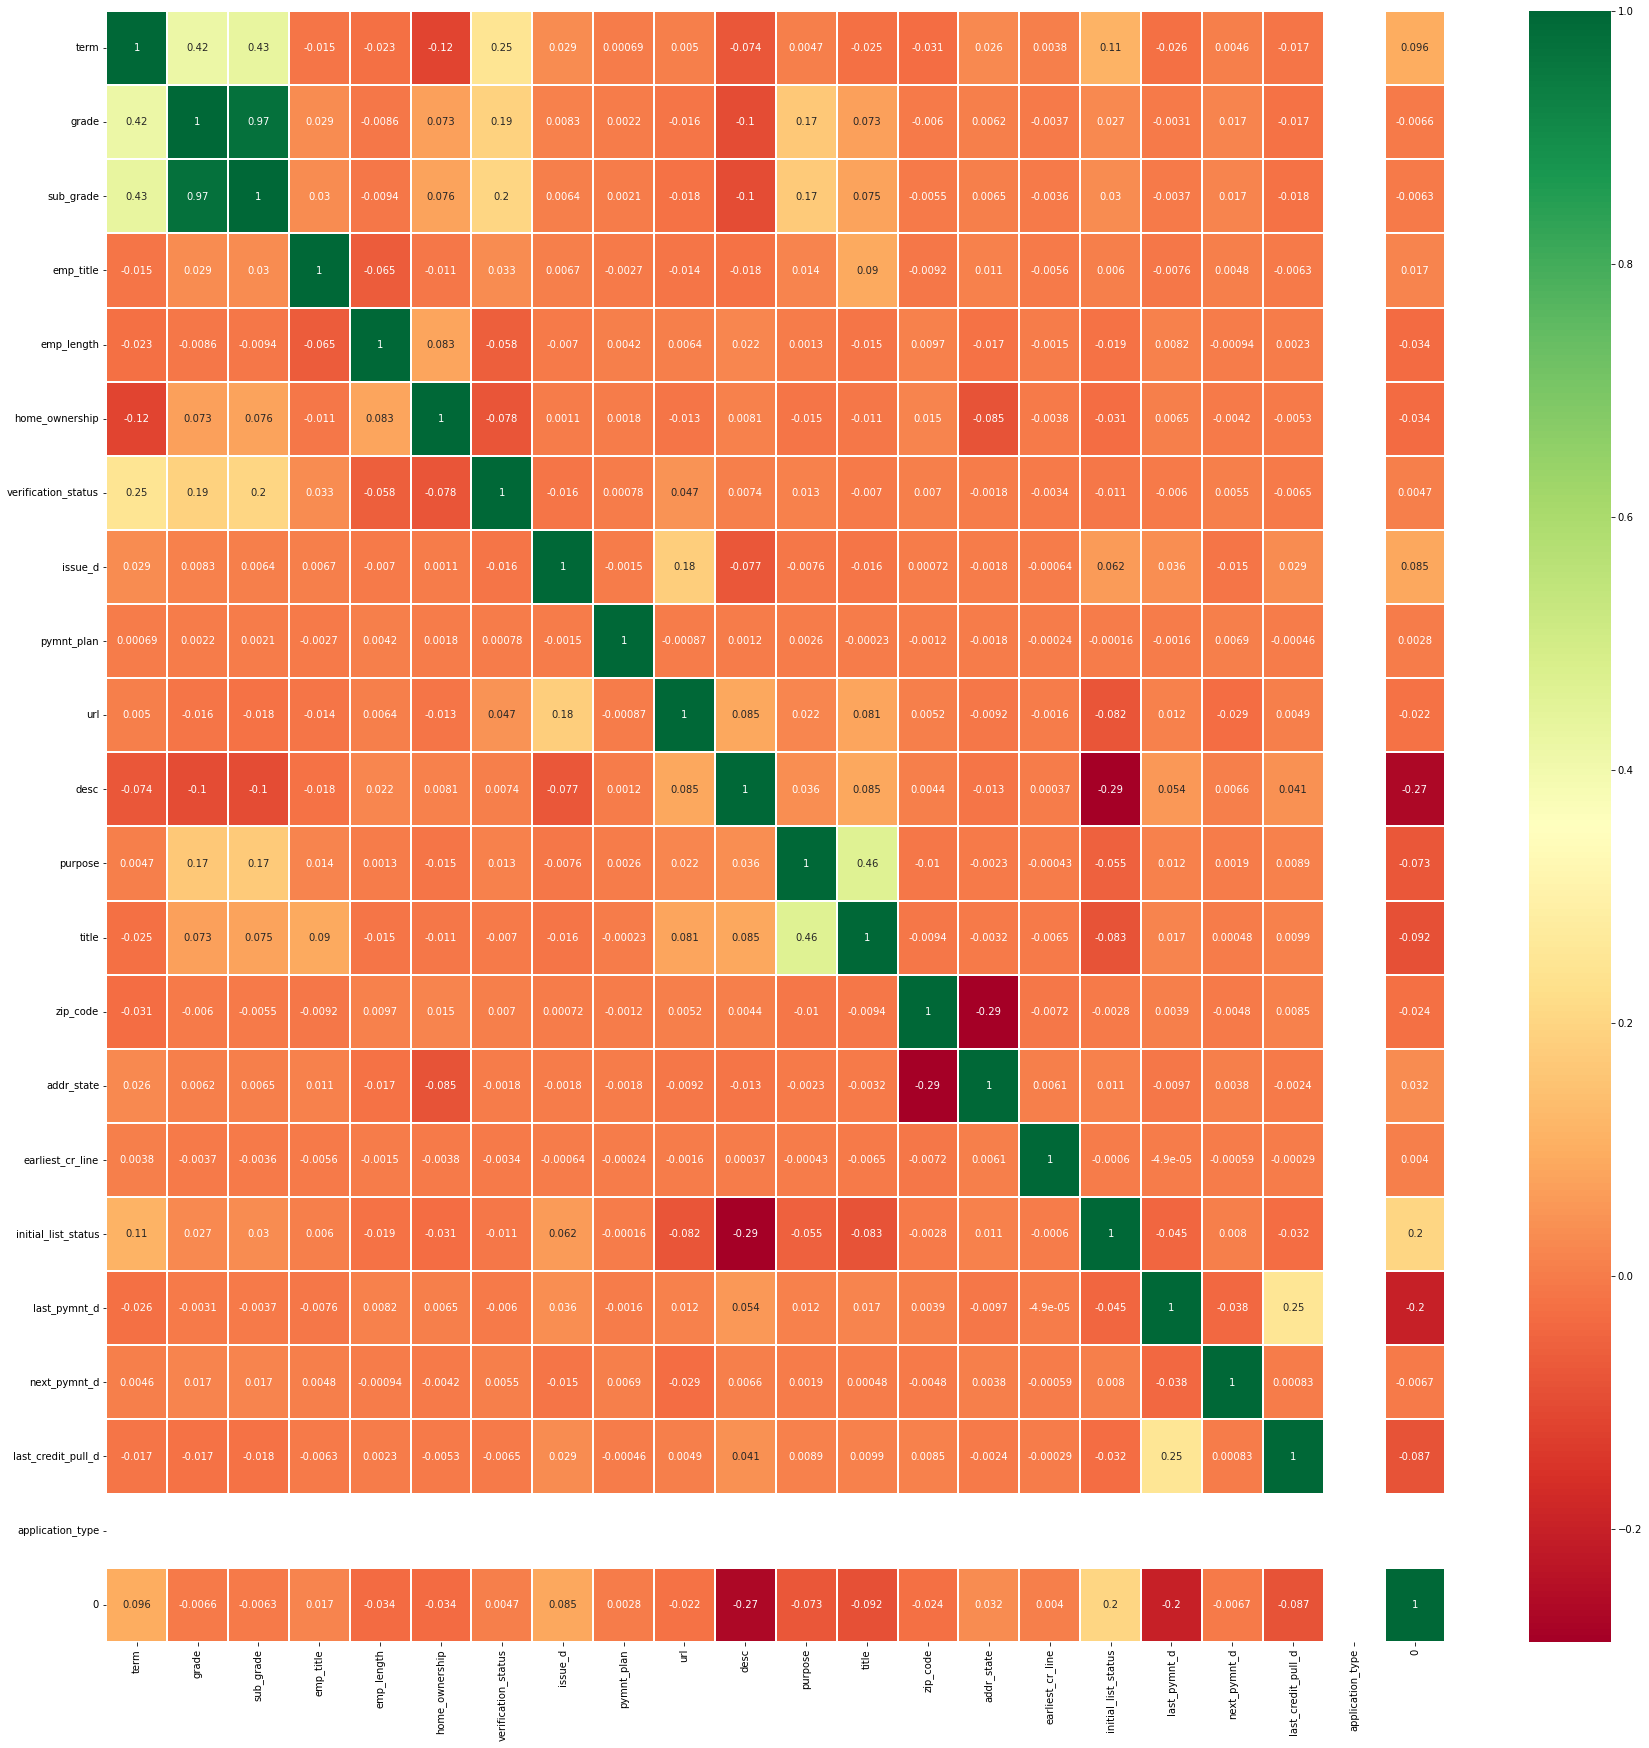

In [46]:
obj_columns = x_train_clean.select_dtypes(include=['object']).columns

# encodinng dengan ordinal encoder
ord_encoder = OrdinalEncoder()
x_train_ord_enc = x_train_clean.copy()
x_train_ord_enc[obj_columns] = ord_encoder.fit_transform(x_train_ord_enc[obj_columns])

# membuat dataframe feature kategori dan target label
heatmap_category = x_train_ord_enc[obj_columns].copy()
heatmap_category = pd.concat([heatmap_category, y_train_enc], axis=1)

# membuat visualisasi heatmap
fig3 = plt.figure(figsize=(30,30))
fig3 = sns.heatmap(heatmap_category.corr(method='spearman'),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

dengan berpegang dengan cara yang sama dengan sebelumnya maka didapatakan 2 feature. karena feature desc memiliki missing value 73% maka korelasi berbanding terbailik ini tidak bisa dipercaya. bisa dilakukan NLP pada feature ini untuk memprediksi credit score juga. namun pada kali ini tidak akan digunakan, bisa menjadi improvement selanjutnya.

In [47]:
cat_select = ['initial_list_status','last_pymnt_d']

## VII. Modeling

melakukan feature selection pada dataset x_train dan x_test, pada x_test dilakukan handling missing value saja dengan cara drop.

In [48]:
# select feature yang akan dimasukan kedalam model dari list yang telah dibuat sebelumnya
x_train_select = x_train_clean[num_select+cat_select]

# memilih feature yang akan dimasukan kedalam model dari list yang telah dibuat sebelumnya
# pada data test. kemudian melakukan treatment missing value
x_test_select = x_test[num_select+cat_select]
x_test_select = pd.concat([x_test_select,y_test],axis=1)

#drop missing value
x_test_select.dropna(inplace=True)

# membagi kembali target label dan x_test
y_test = x_test_select['loan_status']
x_test_select.drop('loan_status',axis=1,inplace=True)

In [49]:
x_train_select.head()

,inq_last_6mths,out_prncp,total_rec_prncp,recoveries,last_pymnt_amnt,initial_list_status,last_pymnt_d
262809,0.0,25208.19,4791.81,0.0,765.73000,w,Jan-16
105968,2.0,0.00,21000.00,0.0,7500.04375,f,Apr-15
382565,1.0,3866.61,3483.39,0.0,252.96000,f,Dec-15
310677,1.0,3466.35,2533.65,0.0,182.62000,w,Jan-16
296585,0.0,9296.99,5703.01,0.0,485.07000,f,Jan-16
...,...,...,...,...,...,...,...
213719,2.0,0.00,12000.00,0.0,5534.29000,f,Jun-14
234496,1.0,8437.67,1562.33,0.0,241.01000,w,Jan-16
277951,1.0,12166.53,3133.47,0.0,326.22000,w,Jan-16
68550,0.0,0.00,17500.00,0.0,7500.04375,w,Jul-14


melakukan modeling dengan menggunakan pipeline. scaler yang digunakan adalah standard scaler, dan encoding yang digunakan adalah ordinal encoder. karena kolom 'initial_list_status' memiliki 2 kategori dan 'last_pymnt_d' merupakan tanggal maka digunakan ordinal encoder

In [50]:
transformer_std = StandardScaler()
transformer_ord = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_std, num_select),
        ('cat', transformer_ord, cat_select),
    ])

clf_decision_tree = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(random_state=42))])
clf_random_forest = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])
clf_knn = Pipeline(steps=[('preprocessor', preprocessor),('classifier', KNeighborsClassifier())])
clf_gaussian_nb = Pipeline(steps=[('preprocessor', preprocessor),('classifier', GaussianNB())])
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),('classifier', XGBClassifier(random_state=42,verbosity=0))])

model yang akan digunakan adalah decision tree, random forest, K nearest neighbour, naive bayes, dan xtreme gradient boosting dengan hyperparameter default

kemudian training dengan setiap model

In [51]:
clf_decision_tree.fit(x_train_clean, y_train_clean)
clf_random_forest.fit(x_train_clean, y_train_clean)
clf_knn.fit(x_train_clean, y_train_clean)
clf_gaussian_nb.fit(x_train_clean, y_train_clean)
clf_xgb.fit(x_train_clean, y_train_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['inq_last_6mths',
                                                   'out_prncp',
                                                   'total_rec_prncp',
                                                   'recoveries',
                                                   'last_pymnt_amnt']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['initial_list_status',
                                                   'last_pymnt_d'])])),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_con

dilakukan scoring masing-masing model

In [52]:
score_decision_tree = clf_decision_tree.score(x_train_select, y_train_clean)
score_random_forest = clf_random_forest.score(x_train_select, y_train_clean)
score_knn = clf_knn.score(x_train_select, y_train_clean)
score_gaussian_nb = clf_gaussian_nb.score(x_train_select, y_train_clean)
score_xgb = clf_xgb.score(x_train_select, y_train_enc)

In [53]:
print(f'Score Decision Tree : {score_decision_tree:.2%}')
print(f'Score Random Forest : {score_random_forest:.2%}')
print(f'Score KNN : {score_knn:.2%}')
print(f'Score Gaussian NB : {score_gaussian_nb:.2%}')
print(f'Score xgboost : {score_xgb:.2%}')

Score Decision Tree : 99.91%
Score Random Forest : 99.91%
Score KNN : 96.90%
Score Gaussian NB : 94.22%
Score xgboost : 98.23%


didapatkan decision tree dan random forest dengan akurasi hampir 100% namun ini harus dilakukan cross validation agar nilai tersebut menjadi valid

### Cross Validation

In [54]:
crossval_dt = cross_val_score(clf_decision_tree, x_train_select, y_train_clean, cv=5)
crossval_rf = cross_val_score(clf_random_forest, x_train_select, y_train_clean, cv=5)
crossval_knn = cross_val_score(clf_knn, x_train_select, y_train_clean, cv=5)
crossval_gnb = cross_val_score(clf_gaussian_nb, x_train_select, y_train_clean, cv=5)
crossval_xgb = cross_val_score(clf_xgb, x_train_select, y_train_enc, cv=5)

dilakukan crossvalidation dengan cv = 5

hasilnya akan dilihat pada bab selanjutnya Evaluation

## VIII. Evaluation

### Evaluasi Decision Tree

In [55]:
ypred_dt_train = clf_decision_tree.predict(x_train_select)
ypred_dt_test = clf_decision_tree.predict(x_test_select)

print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_dt_test))
print('Accuracy - Train Set  : ', accuracy_score(y_train_clean, ypred_dt_train))

print('Cross Validation decision tree ---------------------')
print('Accuracy - All - Cross Validation  : ', crossval_dt)
print('Accuracy - Mean - Cross Validation : ', crossval_dt.mean())

print('Classification Report test: \n', classification_report(y_test, ypred_dt_test), '\n')
print('Classification Report train: \n', classification_report(y_train_clean, ypred_dt_train), '\n')

Accuracy - Test Set   :  0.9627590499801453
Accuracy - Train Set  :  0.9991197335036333
Cross Validation decision tree ---------------------
Accuracy - All - Cross Validation  :  [0.96490471        nan 0.96501927 0.96494736 0.96428571]
Accuracy - Mean - Cross Validation :  nan
Classification Report test: 
               precision    recall  f1-score   support

         bad       0.93      0.91      0.92      9133
   excellent       0.98      0.98      0.98     36947
        good       0.98      0.98      0.98     44844
        poor       0.54      0.53      0.54      2253

    accuracy                           0.96     93177
   macro avg       0.86      0.85      0.85     93177
weighted avg       0.96      0.96      0.96     93177
 

Classification Report train: 
               precision    recall  f1-score   support

         bad       1.00      1.00      1.00     33757
   excellent       1.00      1.00      1.00    139855
        good       1.00      1.00      1.00    165786
       

model ternyata cenderung overfit terhadap train dataset. dengan test dataset hanya 96% akurasi. dilihat dari F1 score untuk klasifikasi "poor" mendapatkan skor yang paling jelek karena memang datanya tidak banyak untuk klasifikasi poor. untuk cross validation rata-rata mendapatkan nilai 96% accuracy

### Evaluasi Random Forest

In [56]:
ypred_rf_train = clf_random_forest.predict(x_train_select)
ypred_rf_test = clf_random_forest.predict(x_test_select)

print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_rf_test))
print('Accuracy - Train Set  : ', accuracy_score(y_train_clean, ypred_rf_train))

print('Cross Validation random forest ---------------------')
print('Accuracy - All - Cross Validation  : ', crossval_rf)
print('Accuracy - Mean - Cross Validation : ', crossval_rf.mean())

print('Classification Report test: \n', classification_report(y_test, ypred_rf_test), '\n')
print('Classification Report train: \n', classification_report(y_train_clean, ypred_rf_train), '\n')

Accuracy - Test Set   :  0.9717634180108825
Accuracy - Train Set  :  0.9990938433125637
Cross Validation random forest ---------------------
Accuracy - All - Cross Validation  :  [0.97393743        nan 0.97492952 0.97323227 0.9732035 ]
Accuracy - Mean - Cross Validation :  nan
Classification Report test: 
               precision    recall  f1-score   support

         bad       0.95      0.90      0.92      9133
   excellent       0.98      0.99      0.98     36947
        good       0.98      1.00      0.99     44844
        poor       0.89      0.50      0.64      2253

    accuracy                           0.97     93177
   macro avg       0.95      0.85      0.88     93177
weighted avg       0.97      0.97      0.97     93177
 

Classification Report train: 
               precision    recall  f1-score   support

         bad       1.00      1.00      1.00     33757
   excellent       1.00      1.00      1.00    139855
        good       1.00      1.00      1.00    165786
       

model random forest cenderung overfit terhadap train data, nilai cross validation rata-rata menunjukan akuarasi 97% dengan f1 score "poor" lebih baik daripada decision tree

### Evaluasi K Nearest Neighbor

In [57]:
ypred_knn_train = clf_knn.predict(x_train_select)
ypred_knn_test = clf_knn.predict(x_test_select)

print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_knn_test))
print('Accuracy - Train Set  : ', accuracy_score(y_train_clean, ypred_knn_train))

print('Cross Validation knn---------------------')
print('Accuracy - All - Cross Validation  : ', crossval_knn)
print('Accuracy - Mean - Cross Validation : ', crossval_knn.mean())

print('Classification Report test: \n', classification_report(y_test, ypred_knn_test), '\n')
print('Classification Report train: \n', classification_report(y_train_clean, ypred_knn_train), '\n')

Accuracy - Test Set   :  0.9602369683505586
Accuracy - Train Set  :  0.9689950578501936
Cross Validation knn---------------------
Accuracy - All - Cross Validation  :  [0.96027328        nan 0.96138024 0.95992751 0.96005696]
Accuracy - Mean - Cross Validation :  nan
Classification Report test: 
               precision    recall  f1-score   support

         bad       0.90      0.85      0.87      9133
   excellent       0.96      0.97      0.97     36947
        good       0.97      1.00      0.98     44844
        poor       0.92      0.47      0.62      2253

    accuracy                           0.96     93177
   macro avg       0.94      0.82      0.86     93177
weighted avg       0.96      0.96      0.96     93177
 

Classification Report train: 
               precision    recall  f1-score   support

         bad       0.93      0.89      0.91     33757
   excellent       0.97      0.98      0.98    139855
        good       0.98      1.00      0.99    165786
        poor      

model knn memiliki akurasi dan f1 score paling konsisten dan tidak overfit. dengan validation score rata-rata 96%

### Evaluasi Naive Bayes

In [58]:
ypred_nb_train = clf_gaussian_nb.predict(x_train_select)
ypred_nb_test = clf_gaussian_nb.predict(x_test_select)

print('Accuracy - Test Set   : ', accuracy_score(y_test, ypred_nb_test))
print('Accuracy - Train Set  : ', accuracy_score(y_train_clean, ypred_nb_train))

print('Cross Validation naive bayes ---------------------')
print('Accuracy - All - Cross Validation  : ', crossval_gnb)
print('Accuracy - Mean - Cross Validation : ', crossval_gnb.mean())

print('Classification Report test: \n', classification_report(y_test, ypred_nb_test), '\n')
print('Classification Report train: \n', classification_report(y_train_clean, ypred_nb_train), '\n')

Accuracy - Test Set   :  0.939867134593301
Accuracy - Train Set  :  0.9422389837236999
Cross Validation naive bayes ---------------------
Accuracy - All - Cross Validation  :  [0.94289824        nan 0.94276797 0.9414303  0.9419481 ]
Accuracy - Mean - Cross Validation :  nan
Classification Report test: 
               precision    recall  f1-score   support

         bad       0.99      0.52      0.68      9133
   excellent       0.90      1.00      0.95     36947
        good       0.97      1.00      0.99     44844
        poor       0.92      0.49      0.64      2253

    accuracy                           0.94     93177
   macro avg       0.95      0.75      0.81     93177
weighted avg       0.94      0.94      0.93     93177
 

Classification Report train: 
               precision    recall  f1-score   support

         bad       0.99      0.54      0.70     33757
   excellent       0.90      1.00      0.95    139855
        good       0.97      1.00      0.99    165786
        po

naive bayes tidak overfit namun untuk f1 score "bad" hanya berkisar 70% sehingga mempengaruhi akurasi. bila dilihat dari cross validation rata-rata mendapatkan nilai akurasi 94%

### Evaluasi XGBoost

sebelum melakukan predict dengan xgboost dilakukan transformasi label target terlebih dahulu, karena library xgboost tidak bisa predict langsung dari target label objek, harus dengan numerik

In [59]:
y_test_enc = label_enc.transform(y_test)

In [60]:
ypred_xgb_train = clf_xgb.predict(x_train_select)
ypred_xgb_test = clf_xgb.predict(x_test_select)

print('Accuracy - Test Set   : ', accuracy_score(y_test_enc, ypred_xgb_test))
print('Accuracy - Train Set  : ', accuracy_score(y_train_enc, ypred_xgb_train))

print('Cross Validation xgboost---------------------')
print('Accuracy - All - Cross Validation  : ', crossval_xgb)
print('Accuracy - Mean - Cross Validation : ', crossval_xgb.mean())

print('Classification Report test: \n', classification_report(y_test_enc, ypred_xgb_test), '\n')
print('Classification Report train: \n', classification_report(y_train_enc, ypred_xgb_train), '\n')

Accuracy - Test Set   :  0.9774837137920303
Accuracy - Train Set  :  0.9822565890536272
Cross Validation xgboost---------------------
Accuracy - All - Cross Validation  :  [0.98006472        nan 0.98095622 0.97943156 0.98005005]
Accuracy - Mean - Cross Validation :  nan
Classification Report test: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      9133
           1       0.98      0.99      0.99     36947
           2       0.98      1.00      0.99     44844
           3       0.93      0.51      0.66      2253

    accuracy                           0.98     93177
   macro avg       0.97      0.86      0.90     93177
weighted avg       0.98      0.98      0.98     93177
 

Classification Report train: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     33757
           1       0.99      0.99      0.99    139855
           2       0.98      1.00      0.99    165786
           3  

untuk 0 artinya bad, 1 artinya excellent, 2 artinya good dan 3 poor

model XGBoost memiliki f1 score "poor" yang paling baik yaitu 69%, kemudian bila dilihat dari cross validation nilai akurasinya paling tinggi dengan nilai 98%. nilai ini sudah cukup besar daripada model yang lain, dan sangat baik. untuk itu tidak dilakukan hyperparameter tuning untuk model ini. karena sudah sangat baik.

model XGBoost adalah model yang akan dipakai untuk data inference dan deployment.

In [61]:
# di comment agar tidak tertimpa modelnya

# import pickle
# with open('model/model_credit_score.pkl','wb') as f:
#     pickle.dump(clf_xgb,f)

kemudian model di save menjadi model_credit_score.pkl

## IX. Data Inference

melakukan prediksi terhadap data inference untuk mencoba model XGBoost yang telah dibuat

In [62]:
data_inf

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,359679,19907895,22130544,11000,11000,11000.0,36 months,11.67,363.63,B,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,191017.0,20700.0
1,98896,6844900,8467053,30000,30000,29950.0,60 months,12.35,672.66,B,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,72610.0,53200.0
2,378928,17413360,19535897,14400,14400,14400.0,60 months,13.98,334.92,C,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,225318.0,46000.0
3,122070,5955052,7427193,6000,6000,5950.0,36 months,9.71,192.79,B,...,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,0.0,86.0,7905.0,25600.0
4,204847,1452833,1706564,4000,4000,4000.0,36 months,12.12,133.09,B,...,NaN,Nov-14,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
5,176139,2835471,3417764,10000,10000,9925.0,36 months,15.80,350.59,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,113523.0,8000.0
6,143456,4568302,5820635,25000,25000,25000.0,60 months,21.98,690.19,E,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,50.0,679998.0,7300.0
7,61344,9005984,10798079,16000,16000,15925.0,36 months,7.62,498.59,A,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,51817.0,61600.0
8,208742,1409714,1659276,4750,4750,4750.0,36 months,14.33,163.11,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
9,419144,13127910,15150086,29675,29675,29625.0,60 months,22.45,827.21,E,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,66365.0,24800.0


cleaning target label menjadi yang sesuai dari model gunakan

In [63]:
data_inf['loan_status'] = data_inf['loan_status'].replace(
    {'Fully Paid':'excellent',
    'Current':'good',
    'Charged Off': 'bad',
    'Default':'bad',
    'In Grace Period':'poor',
    'Late (16-30 days)':'poor',
    'Late (31-120 days)':'poor',
    'Does not meet the credit policy. Status:Charged Off':'bad',
    'Does not meet the credit policy. Status:Fully Paid':'bad'})

memilih feature yang digunakan untuk model

In [64]:
data_inf_select = data_inf[num_select + cat_select]

melakukan checking apabila ada missing value

In [65]:
data_inf_select.isnull().sum()

inq_last_6mths         0
out_prncp              0
total_rec_prncp        0
recoveries             0
last_pymnt_amnt        0
initial_list_status    0
last_pymnt_d           0
dtype: int64

dilakukan predict dan inverse transfom terhadap nilai prediksi

In [66]:
pred_inf = clf_xgb.predict(data_inf_select)
pred_inf = label_enc.inverse_transform(pred_inf)

melihat dari target label data inference dengan hasil prediksi

In [67]:
data_result = pd.DataFrame()
data_result['actual'] = data_inf['loan_status']
data_result['prediction'] = pred_inf
data_result

,actual,prediction
0,bad,bad
1,good,good
2,good,good
3,excellent,excellent
4,excellent,excellent
5,excellent,excellent
6,good,good
7,good,good
8,excellent,excellent
9,good,good


hasilnya 100% model dapat memprediksi data inference.

## XII. Summary

untuk target label dengan grade, verivication status dan loan purpose masing-masing tidak terlalu berhubungan dengan target label. karena untuk distribusi grade, verification status dan loan purpose masing-masing berdistribusi yang mirip untuk kesetiap klasifikasi target labelnya.

Hasil dari setiap model dari accuracy cross validation adalah sebagai berikut

- Decision Tree dengan accuracy 96%
- Random Forest dengan accuracy 97%
- KNN dengan accuracy 96%
- Naive Bayes dengan accuracy 94%
- XGBoost dengan accuracy 98%

Maka model yang paling bagus adalah model XGBoost sehingga model dipilih sebagai model untuk deployment

hasil dari model ini dapat digunakan untuk membantu seorang credit risk analyst untuk menentukan apakah seorang peminjam tersebut dapat meminjam dengan risk yang paling sedikit oleh lender. dengan menggunakan model yang memiliki akurasi 98%, seorang credit risk analyst dapat lebih mudah dan lebih cepat dalam menentukan peminjam dapat dikatakan baik untuk mendapatkan loan atau tidak dari perusahaan lender



